In [3]:
import gist
import numpy as np
import pandas as pd
import sklearn as sk
import random
import math as mat
import imagehash
import matplotlib.pyplot as plt
from PIL import Image
from skimage import transform

In [4]:
path = '/home/subster2/Рабочий стол/Диплом/memsgenerator/memegenerator1.csv'
df = pd.read_csv(path, sep=',', encoding ='utf-16')

In [17]:
%%time
#считаем хэш
global imgGist 
imgGist = []
imsize = (100, 100)
count = 0
for i in df['Meme ID']:
    path_to_image = '/home/subster2/Рабочий стол/memes/{}.jpg'.format(i)# путь к папке
    j = np.asarray(Image.open(path_to_image))#
    img_resized = transform.resize(j, imsize, preserve_range=True).astype(np.uint8)
    desc = gist.extract(img_resized)
    imgGist.append(desc)# добавляем в массив новый Gist
    count+=1
    if(count%1000==0):
        print(count)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
CPU times: user 36min 48s, sys: 32min 41s, total: 1h 9min 29s
Wall time: 23min 12s


In [20]:
from sklearn.neighbors import BallTree
from sklearn.neighbors import DistanceMetric
metrics=DistanceMetric.get_metric('hamming')
tree = BallTree(imgGist, metric=metrics)

In [76]:
def RecPrec(N,xstart=1,xfinish=25):# номер картинки,от, до.
    valueRec=[]
    valuePrec=[]
    indRadius=[]
    tmpltNme = df['Base Meme Name'][N] #название шаблона
    lenoftmplt = len(df[df['Base Meme Name']== tmpltNme])#кол-во картинок с базовым шаблоном в фрейме
    #print(lenoftmplt)
    for radius in np.arange(xstart, xfinish):
        ind = tree.query_radius(imgGist[N:N+1], r=radius/9600)  #индексы похожих эл-ов
        #print(len(ind[0]))
        sumRaP=0
        #print(radius)
        for i in ind[0]:
            #if(i<57623):
                if((df['Base Meme Name'][i]== tmpltNme)): #мемы, название которых совпадает с шаблоном
                    sumRaP+=1 
           
            
            
        valueRec.append(sumRaP/lenoftmplt)#recall(делим на кол-во всех картинок шаблона)
        valuePrec.append(sumRaP/len(ind[0]))#precision(делим на кол-во близких картинок)
        indRadius.append(radius)
    #plt.plot(indRadius,valueRec,color = 'red')#recall красный
    #plt.plot(indRadius,valuePrec,color = 'blue')#precision голубой
    #plt.xlabel('Радиус')
    return valueRec,valuePrec

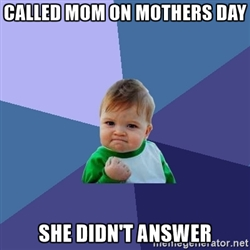

In [65]:
#исходный мем
from IPython.display import Image
path_to_image = '/home/subster2/Рабочий стол/memes/{}.jpg'.format(df['Meme ID'][25931])
Image(filename = path_to_image, width=100, height=100)

530
3
3
3
3
3
3
3
3
3
3
8
8
8
8
8
8
8
8
8
8
57623
57623
57623
57623
57623
57623
57623
57623
57623
57623
CPU times: user 10.8 s, sys: 5.16 ms, total: 10.8 s
Wall time: 10.8 s


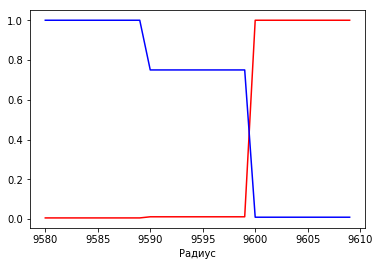

In [67]:
%%time
import time
one = RecPrec(7,9580,9610)#recall красный, precisition голубой
#print(one)

10
20
30
40
50
60
70
80
90
[1.02522536 1.02522536 1.02522536 1.02522536 1.02522536 1.02522536
 1.02522536 1.02522536 1.02522536 1.02522536 1.5114435  1.5114435
 1.5114435  1.5114435  1.5114435  1.5114435  1.5114435  1.5114435
 1.5114435  1.5114435 ] [100.         100.         100.         100.         100.
 100.         100.         100.         100.         100.
  52.71616162  52.71616162  52.71616162  52.71616162  52.71616162
  52.71616162  52.71616162  52.71616162  52.71616162  52.71616162]
CPU times: user 1min 54s, sys: 9.16 ms, total: 1min 54s
Wall time: 1min 54s


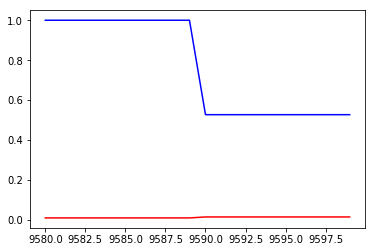

In [78]:
%%time
def add(x, y):
        return list(map(lambda a, b: a + b, x, y))
sumRecprec = RecPrec(0,9580,9600)
for i in range(1,100):
    x = RecPrec(i,9580,9600)
    sumRecprec = add(sumRecprec[0],x[0]),add(sumRecprec[1],x[1])
    if (i%10==0):
        print(i)
    
asd = np.asarray(sumRecprec[0])
asd2 = np.asarray(sumRecprec[1])
print(asd, asd2)
plt.plot(range(9580,9600),asd/100,color = 'red')#recall красный
plt.plot(range(9580,9600),asd2/100,color = 'blue')#precisition голубой

In [5]:
imsize = (100, 100)
filepath = './philosoraptor.jpg'
pilimg = Image.open(filepath)
img = np.asarray(pilimg)
img_resized = transform.resize(img, imsize, preserve_range=True).astype(np.uint8)
desc = gist.extract(img_resized)
print(desc)

[0.00824775 0.01344264 0.05066734 0.01463774 0.00662507 0.05701797
 0.07091258 0.01767719 0.02265266 0.07067637 0.0298837  0.0545548
 0.0100696  0.03643286 0.02981281 0.02961988 0.00417264 0.01080422
 0.03303696 0.0103573  0.00394886 0.05797853 0.06798861 0.0101579
 0.0124176  0.05909685 0.02851515 0.0331273  0.00602997 0.0417145
 0.03538342 0.03341825 0.00171127 0.01002082 0.02621022 0.00872982
 0.00371144 0.05035347 0.07054244 0.00508537 0.00712939 0.05596847
 0.03538369 0.02271703 0.00327893 0.05021709 0.04029587 0.03491688
 0.00431381 0.01012021 0.02442962 0.01268583 0.0065327  0.0580281
 0.07335603 0.01296886 0.0129222  0.10164002 0.05533469 0.01994354
 0.00615058 0.04218609 0.0429837  0.03479293 0.00824882 0.00969985
 0.02257731 0.02150323 0.01538258 0.10091753 0.08640975 0.02407555
 0.02304293 0.16712685 0.08394865 0.02855047 0.01111176 0.05291589
 0.04181059 0.04119881 0.00438234 0.01263372 0.02578527 0.01772168
 0.01026089 0.1036167  0.08628798 0.01498775 0.01293526 0.11747906